In [0]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import numpy as np
from datetime import datetime
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

In [2]:
from google.colab import drive
drive.mount('/content/gdrive') # to  113

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
data_path = "/content/gdrive/My Drive/stock prediction/"
df = pd.read_csv(os.path.join(data_path, "gogl.us.txt"))
print(df.shape)


(3201, 7)


In [4]:
df.head(20)

,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-02-25,141.94,143.84,141.20,143.18,89902,0
1,2005-02-28,143.70,147.19,139.47,143.14,124965,0
2,2005-03-01,141.79,142.57,131.36,134.50,229663,0
3,2005-03-02,135.27,139.11,135.06,137.56,88113,0
4,2005-03-03,138.59,138.59,132.24,134.89,120294,0
5,2005-03-04,134.00,137.00,133.34,136.47,68711,0
6,2005-03-07,136.66,137.35,134.18,135.06,81653,0
7,2005-03-08,134.36,134.78,130.41,130.54,150554,0
8,2005-03-09,130.72,132.17,127.52,129.21,131825,0
9,2005-03-10,129.21,129.21,119.22,121.95,312669,0


In [0]:
df.drop(df.index[[0,1,2,3,4,5]], inplace = True)

In [6]:
df.head(5) # Now data is in sequence of 5 days , Monday to Friday

,Date,Open,High,Low,Close,Volume,OpenInt
6,2005-03-07,136.66,137.35,134.18,135.06,81653,0
7,2005-03-08,134.36,134.78,130.41,130.54,150554,0
8,2005-03-09,130.72,132.17,127.52,129.21,131825,0
9,2005-03-10,129.21,129.21,119.22,121.95,312669,0
10,2005-03-11,123.92,128.57,123.92,126.67,128252,0


In [7]:
df.drop(["Date", "OpenInt"], axis = 1, inplace = True)
df.head()

,Open,High,Low,Close,Volume
6,136.66,137.35,134.18,135.06,81653
7,134.36,134.78,130.41,130.54,150554
8,130.72,132.17,127.52,129.21,131825
9,129.21,129.21,119.22,121.95,312669
10,123.92,128.57,123.92,126.67,128252


In [0]:
x_columns = ['Open', 'High', 'Low', 'Volume']
y_columns = ['Close']
x_data_original = df[x_columns]
y_data_original = df[y_columns]

In [9]:
x_data_original.head()

,Open,High,Low,Volume
6,136.66,137.35,134.18,81653
7,134.36,134.78,130.41,150554
8,130.72,132.17,127.52,131825
9,129.21,129.21,119.22,312669
10,123.92,128.57,123.92,128252


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_data = scaler.fit_transform(x_data_original)
y_data = y_data_original.values
print(x_data[0:5])

[[0.82169354 0.8168843  0.81895104 0.03513489]
 [0.8075909  0.80127543 0.79549555 0.06762313]
 [0.78527194 0.78542363 0.77751509 0.05879202]
 [0.77601324 0.7674461  0.72587569 0.1440637 ]
 [0.74357717 0.76355906 0.75511728 0.05710728]]


***Neural Network***

In [11]:
from sklearn import metrics
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from datetime import datetime
from keras import regularizers

Using TensorFlow backend.


In [0]:
from keras.layers.recurrent import LSTM, RNN
import sys

## **LSTM**

In [0]:
def to_sequences(seq_size, data):
    x = []
    y = []

    for i in range(len(data)-seq_size-1):
        #print(i)
        window = data.iloc[i:(i+seq_size),:].values
        after_window = data.iloc[i+seq_size,-1]
        window = [x for x in window]
        #print("{} - {}".format(window,after_window))
#         x.append(scaler.fit_transform(window))
        x.append(window)
        y.append(after_window)
    print(np.array(x).shape)
    return np.array(x),np.array(y)

In [0]:
lstm_df = pd.DataFrame(np.hstack([x_data,y_data])) # combining normalized data and the target ("Close" price).

In [15]:
seq = 5
# xt, yt = to_sequences(seq, lstm_df)

(3189, 5, 5)


In [17]:
train = lstm_df[:int(len(lstm_df)*0.7)]  # Take first 70% of data for training.
test = lstm_df[int(len(lstm_df)*0.7):]

x_train, y_train = to_sequences(seq, train)
x_test,y_test = to_sequences(seq, test)

(2230, 5, 5)
(953, 5, 5)


In [0]:
# train.head(10)

In [0]:
# x_train, x_test , y_train, y_test  = train_test_split(xt,yt, test_size = 0.2)

In [18]:
x_train[0]

array([[8.21693543e-01, 8.16884300e-01, 8.18951036e-01, 3.51348879e-02,
        1.35060000e+02],
       [8.07590901e-01, 8.01275433e-01, 7.95495552e-01, 6.76231305e-02,
        1.30540000e+02],
       [7.85271936e-01, 7.85423626e-01, 7.77515087e-01, 5.87920207e-02,
        1.29210000e+02],
       [7.76013244e-01, 7.67446098e-01, 7.25875692e-01, 1.44063697e-01,
        1.21950000e+02],
       [7.43577166e-01, 7.63559065e-01, 7.55117277e-01, 5.71072775e-02,
        1.26670000e+02]])

In [19]:
y_train[0]

132.7

In [0]:
y_train[0]

94.475

In [20]:
model = Sequential()
model.add(LSTM(128, dropout=0.0, recurrent_dropout=0.0, input_shape=(seq, 5), activation = "relu")) 
# model.add(Dropout(0.2))
model.add(Dense(32, activation ="relu"))
# model.add(Dropout(0.3))
model.add(Dense(1, activation = "linear"))
model.compile(loss='mean_squared_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=10, verbose=20, mode='auto')
# t1= datetime.now()
for i in range(3):
  history = model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=1, epochs=200)
# train_time = datetime.now() - t1



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 2230 samples, validate on 953 samples
Epoch 1/200
2230/2230 [==============================] - 2s 829us/step - loss: 1316.9059 - val_loss: 10.8448
Epoch 2/200
2230/2230 [==============================] - 1s 295us/step - loss: 11.4402 - val_loss: 9.5148
Epoch 3/200
2230/2230 [==============================] - 1s 295us/step - loss: 10.0904 - val_loss: 8.7674
Epoch 4/200
2230/2230 [==============================] - 1s 288us/step - loss: 8.8105 - val_loss: 7.7330
Epoch 5/200
2230/2230 [==============================] - 1s 299us/step - loss: 7.5578 - val_loss: 7.7320
Epoch 6/200
2230/2230 [==============================] - 1s 302us/step - loss: 6.9121 - val_loss: 7.0776
Epoch 7/200
2230/2230 [==============================] - 1s 289us/step - loss: 6.0075 - val_loss: 7.1789
Epoch 8/200
2230/2230 [==============================] - 1s 292us/step - loss: 5.7288 - val_loss: 6.4501
Epoch 9/200

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               68608     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 72,769
Trainable params: 72,769
Non-trainable params: 0
_________________________________________________________________


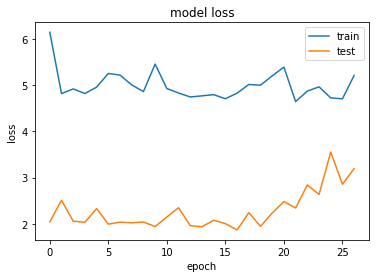

In [22]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [0]:
pred = model.predict(x_test)

In [24]:
from sklearn.metrics import mean_squared_error,r2_score
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("LSTM RMSE",rmse)
# results['LSTM'] = {'RMSE': rmse, 'Training Time': train_time.total_seconds()}

LSTM RMSE 1.7880212868362433


In [0]:
# rpred = pred.reshape(pred.shape[0],)
# create_lift(outcome=y_test, model_proba=rpred, precision = 2, vis = True)

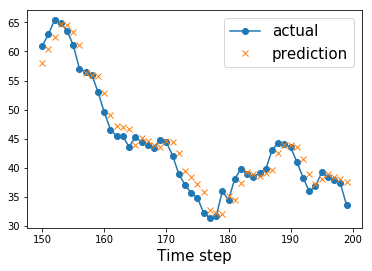

In [25]:
aa=[x for x in range(150,200)]
plt.plot(aa, y_test[150:200], marker='o', label="actual")
plt.plot(aa, pred[150:200], 'x', label="prediction")

plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()


In [0]:
def chart_regression(y,pred,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

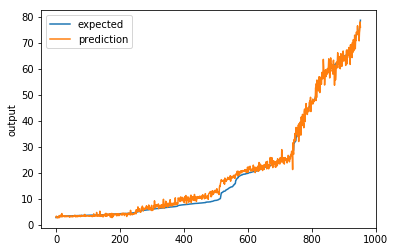

In [27]:
chart_regression(list(y_test), list(pred))

(3189, 5, 5)


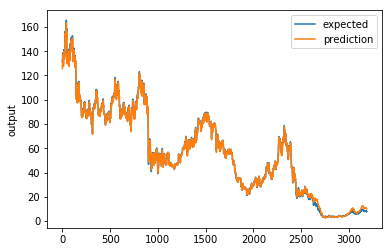

In [29]:
XT,YT = to_sequences(seq, lstm_df)

pred_all = model.predict(XT)
chart_regression(list(YT), list(pred_all), sort = False)